### Modelos de CLASIFICACION - Regresion Logistica

Importante !! No es un modelo de regresion es de clasificacion. Solo se llama regresion logistica.

El modelo de clasificacion implica la prediccion de una variable cualitativa por lo que previamente se debe evaluar como se comportan el resto de variables respecto de la variable predictora. 

Esta evaluacion previa se realiza mediante los estadisticos Chi-cuadrado y T-test. (Ver en fichero Estadisticos_ChiTest_TTest)

* Modelos de Clasificacion 

La clasificación tiene como objetivo asignar una clase, es decir predecir a que clase pertenece un conjunto de datos. 
Se aplica a la prediccion de variables categoricas discretas y puede tomar datos de entrada a la vez continuos o discretos.


* Clasificacion por Regresion Logistica

El modelo de regresión logística permite predecir la probabilidad de que ocurra un evento (valor de 1) o no (valor de 0) a partir de la optimización de los coeficientes de regresión. 
Utiliza una función logística sigmoidal que va de 0 a 1.

* Tipos: 

    - Binarios Ordinal: Utilizado para problemas de clasificacion binarios.
    - Multimodal: cuando la clasificacion tiene mas de dos valores posibles.

 
* Parametros y ecuacion  1/1+e^-S  donde S es la sumatoria de 1 a n de OiXi con O parametros de la/s variable independiente.


Mediante la optimización del modelo se intenta obtener el mejor conjunto de parámetros Θ, que permite que nuestra curva sigmoide se adhiera lo mejor posible a los datos.

Una vez obtenida la funcion sigmoidal y de acuerdo al umbral fijado (generalmente 0,5), se clasifican los puntos según sus posiciones en relación con la regresión.



In [18]:
# Hacer analisis previo de la BD

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\clasificacion-regresion_logistica.csv')

In [32]:
# Compra de vivienda en base a datos de las personas que compraron y no compraron (esta sera nuestra variable objetivo)

In [65]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
df.shape

(400, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [27]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [28]:
#La media de Purchased esta mas cerca de 0 que de 1. Quiere decir que hay mas 0s que 1s en Purchased. Verifico

In [31]:
df['Purchased'].value_counts() # LA VARIABLE OBJETIVO NO ESTA COMPENSADA

0    257
1    143
Name: Purchased, dtype: int64

In [34]:
# Hay que aplicar el t-test para saber si la variable salario esta relacionada con la variable objetivo purchased
# Como estamos comparando la cualitativa con una cuantitativa aplicamos t-test

* t-test entre salary y purchased

In [230]:
#Preparamos los grupos de la variable cualitativa (seleccionamos solo las variables que nos interesa estudiar)

df_C=df.loc[:,['EstimatedSalary', 'Purchased']][df['Purchased']==1]
df_NoC=df.loc[:,['EstimatedSalary','Purchased']][df['Purchased']==0]  # quite la columna 'purchased' no me sirve porque ya estan agrupados

# Al copiar el df esta manteniendo los indices

In [231]:
df_NoC.tail()

,EstimatedSalary,Purchased
377,53000,0
380,64000,0
387,71000,0
394,59000,0
398,33000,0


In [232]:
df_NoC.shape

(257, 2)

In [233]:
df_NoC.shape, df_C.shape # como habiamos visto la variable no esta compensada

((257, 2), (143, 2))

* Tengo que seleccionar aleatoriamente 143 datos de df_NoC

Forma 1 Random Choice (tengo que darle una vuelva porque no me funciono del todo bien)

In [54]:
np.random.seed=2023 # la semilla no funciona

np.sort(np.random.choice(df_NoC['EstimatedSalary'].index, 143, replace=False)) 

# del df obtengo 143 casos aleatorios, sin repeticion
# y me quedo con sus indices
# ordeno ademas para comprobar que no se repiten no       
# TIENE BUENA PINTA

array([  1,   5,   8,  10,  14,  28,  33,  34,  36,  37,  38,  42,  43,
        45,  46,  47,  50,  51,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  64,  66,  67,  69,  71,  74,  78,  79,  80,  84,  88,
        89,  90,  91,  94,  98,  99, 100, 105, 111, 112, 113, 116, 117,
       119, 120, 121, 122, 128, 131, 133, 134, 136, 139, 141, 143, 144,
       148, 151, 154, 156, 158, 161, 163, 164, 166, 167, 169, 170, 171,
       172, 173, 174, 180, 183, 184, 187, 188, 190, 191, 192, 193, 196,
       198, 199, 200, 201, 207, 212, 213, 214, 216, 217, 218, 225, 228,
       231, 234, 236, 237, 244, 250, 256, 257, 263, 266, 270, 276, 281,
       286, 288, 293, 295, 298, 305, 309, 312, 319, 322, 326, 332, 337,
       338, 341, 342, 345, 348, 349, 351, 359, 368, 372, 374, 376, 394],
      dtype=int64)

In [79]:
df_NoC.shape # son 257 pero mantiene los indices originales de df 

(257, 2)

In [95]:
# ESTO TIENE UN PROBLEMA. CUANDO INTENTO OBTENER POR ESTOS INDICES ME DA VALOR FUERA DE RANGO. 
# Como que mantiene los indices del df original pero al acceder utiliza un reindex y ya no concuerda con los indices originales

Forma 2 Random Shuffle (como que no)

In [72]:
lista=list(df_NoC['EstimatedSalary'])
np.random.shuffle(lista)
len(lista) # esta es una lista mezclada de los salarios pero asi se pierde el indice del df
# deberia hacer el shuffle del df pero me quedaria desordenado.
# ESTA OPCION ME PARECE LIANTE

257

Forma 3 Con un sample 

In [234]:
# Seria la forma mas efectiva y directa

df_NoC=df_NoC.sample(143)

In [235]:
df_NoC.shape 

(143, 2)

In [236]:
import scipy

In [243]:
# Genero el ttest

ttest_ind(df_C.iloc[:,0], df_NoC.iloc[:,0]) # solo la columna de salario

# ttest_ind(df_C['EstimatedSalary'], df_NoC['EstimatedSalary'])

Ttest_indResult(statistic=6.188120757391887, pvalue=2.1206090439394725e-09)

In [244]:
# p-valor es muy pequeña

riesgo=0.05
p_value=ttest_ind(df_C.iloc[:,0], df_NoC.iloc[:,0]) # variable trim para indicar el nivel de riesgo por defecto 0,05
print (p_value)
print('\nP-valor',p_value[1],'\n')
if p_value[1]>riesgo:
    print('Aceptamos H0: Las variables son independientes')
else:
    print('Rechazamos H0, aceptamos H1: Las variables tienen dependencia')

Ttest_indResult(statistic=6.188120757391887, pvalue=2.1206090439394725e-09)

P-valor 2.1206090439394725e-09 

Rechazamos H0, aceptamos H1: Las variables tienen dependencia


FALTARIA COMPROBAR SI HAY RELACION ENTRE PURCHASED Y EDAD

#### Una vez comprobado que las variables tienen relacion podemos utilizar el modelo de clasificacion

#### Division variables independientes y objetivo

In [102]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [246]:
x=df.iloc[:,[2,3]].values # array

In [245]:
y=df.iloc[:,4].values #lista

In [250]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [139]:
# x / y son arrays
# y # el modelo prefiere un array de una dimension pero de momento solo es un warning

#### Dummy no hay

#### Recategorizar no

En este caso las variables no necesitan dummificar ni recategorizar

#### Dividir en training y test

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1987)

#### Normalizacion/estandarizacion 

Es aconsejable realizar una estandarizacion porque las magnitudes son diferentes (edad y salario)

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [121]:
# x_train ya se ve que esta normalizado

In [122]:
# NO es necesario normalizar y. Es la variable booleana

In [135]:
# y_test

#### Crear el modelo

In [136]:
#### Modelo de clasificacion por regresion logistica

from sklearn.linear_model import LogisticRegression

In [255]:
clasificador=LogisticRegression(random_state=1987)
clasificador.fit(x_train,y_train)  # la advertencia es por y 

LogisticRegression(random_state=1987)

In [256]:
clasificador.predict(x_test) # aqui esta la prediccion

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [153]:
"""vector=np.array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1])
vector.reshape(120,1)"""

'vector=np.array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,\n       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,\n       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,\n       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,\n       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,\n       0, 0, 0, 1, 0, 0, 0, 1, 0, 1])\nvector.reshape(120,1)'

#### Evaluacion de modelo

Para la evaluacion del modelo de clasificacion por regresion logistica necesitamos:
    
* La matriz de confusion que es una matriz o tabla de contingencia.
    
En esta tabla tenemos los valores posibles de y_test (reales) contra los valores de la prediccion sobre x_test.

En la diagonal tendremos los aciertos y en la contradiagonal los fallos

In [141]:
from sklearn.metrics import confusion_matrix

In [257]:
matriz_conf=confusion_matrix(y_test, clasificador.predict(x_test))
matriz_conf  # Me pase estos 102 aciertos de la prediccion y los datos reales y comprobe que es correcto.

array([[70,  5],
       [13, 32]], dtype=int64)

* VP=70
* FP=5
* FN=13
* VN=32

In [258]:
accuracy_exactitud=(matriz_conf[0,0]+matriz_conf[1,1])/matriz_conf.sum()
accuracy_exactitud

0.85

In [259]:
precision_precision=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[0,1])
precision_precision

0.9333333333333333

In [260]:
specifity_especificidad=matriz_conf[1,1]/(matriz_conf[1,1]+matriz_conf[0,1])
specifity_especificidad

0.8648648648648649

In [261]:
recall_sensibilidad=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[1,0])
recall_sensibilidad

0.8433734939759037

F1 SCORE como evaluacion global del modelo

In [262]:
f1_score=2*precision_precision*recall_sensibilidad/(precision_precision+recall_sensibilidad)
f1_score

0.8860759493670886

In [263]:
print('Aciertos: ', 70+32)
print('Fallos: ',13+5)  # casos de testing 0.3*400 = 120 correcto
print ('Precision:', 102/120)

Aciertos:  102
Fallos:  18
Precision: 0.85


In [264]:
## Funcion de evaluacion
def Evaluacion_ClasificacionRL(matriz_conting):
    precision_precision=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[0,1])
    accuracy_exactitud=(matriz_conf[0,0]+matriz_conf[1,1])/matriz_conf.sum()
    specifity_especificidad=matriz_conf[1,1]/(matriz_conf[1,1]+matriz_conf[0,1])
    recall_sensibilidad=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[1,0])
    f1_score=2*precision_precision*recall_sensibilidad/(precision_precision+recall_sensibilidad)
    print(f"Precision: {precision_precision:.2f}\nExactitud: {accuracy_exactitud:.2f}\nEspecificidad: {specifity_especificidad:.2f}\nSensibilidad: {recall_sensibilidad:.2f}\nPuntuación F1: {f1_score:.2f}")
    

In [265]:
Evaluacion_ClasificacionRL(matriz_conf)

Precision: 0.93
Exactitud: 0.85
Especificidad: 0.86
Sensibilidad: 0.84
Puntuación F1: 0.89


#### Visualizacion del modelo

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


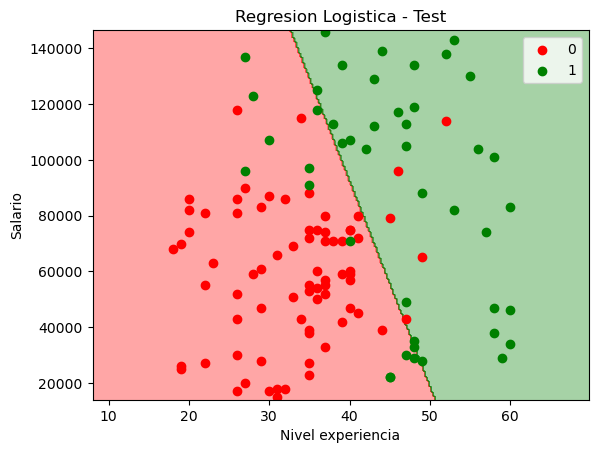

In [267]:
from matplotlib.colors import ListedColormap 
x_set, y_set = sc_x.inverse_transform(x_test), y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10, stop = x_set[:,0].max()+10, step=0.25), np.arange(start=x_set[:,1].min()-1000, stop=x_set[:,1].max()+1000, step=500)) # coord x e y
plt.contourf(x1,x2,clasificador.predict(sc_x.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.35,cmap=ListedColormap(('red','green'))) # ravel() aplana la matriz
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c = ListedColormap(('red','green'))(i),label=j)
plt.title('Regresion Logistica - Test')
plt.xlabel('Nivel experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

La función numpy.meshgrid devuelve una lista de matrices de coordenadas a partir de vectores de coordenadas.
Por ej: siendo dos vectores de coordenadas, coord_x y coor_y, devuelve dos arrays, X e Y, conteniendo el primero la coordenada X de los 9 puntos, y el segundo la coordenada Y de los mismos

La funcion ravel() aplana un array/matriz. En este caso de array 2D a array 1D.